In [156]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [158]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [160]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [163]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [165]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
scaled_data = scaler.fit_transform(market_data_df)
scaled_market_data_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=market_data_df.columns)

# Display sample data
scaled_market_data_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [168]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, n_init='auto', random_state=1)
    
    kmeans_model.fit(scaled_market_data_df)
    
    inertia.append(kmeans_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,145.897940
3,4,131.457370
4,5,66.317106
5,6,57.402668
6,7,49.212644
7,8,44.799804
8,9,33.859468
9,10,29.250314


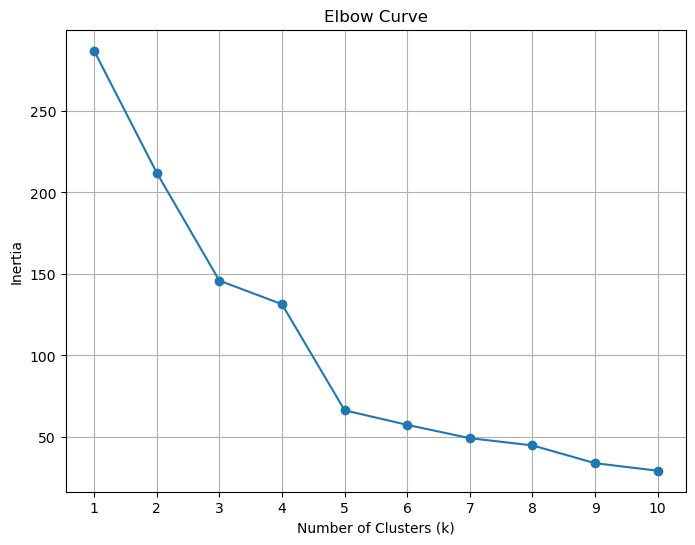

In [170]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Plot a line chart with the inertia values
plt.figure(figsize=(8, 6))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o')
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(elbow_df["k"])
plt.grid(True)
plt.show()




#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4 

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [174]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, n_init='auto', random_state=1)

In [176]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_market_data_df)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [178]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = kmeans_model.predict(scaled_market_data_df)

# View the resulting array of cluster values.
print(crypto_clusters)


[1 1 2 2 1 1 1 1 2 2 0 2 2 1 2 2 2 2 1 2 0 1 2 2 2 2 2 0 1 2 2 2 3 2 0 0 1
 0 2 2 0]


In [180]:
# Create a copy of the DataFrame
crypto_market_data_predictions = scaled_market_data_df.copy()


In [182]:
# Add a new column to the DataFrame with the predicted clusters
crypto_market_data_predictions['Cluster'] = crypto_clusters


# Display sample data
crypto_market_data_predictions.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


<Axes: title={'center': 'Cryptocurrency Clusters by 24h and 7d Price Change'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

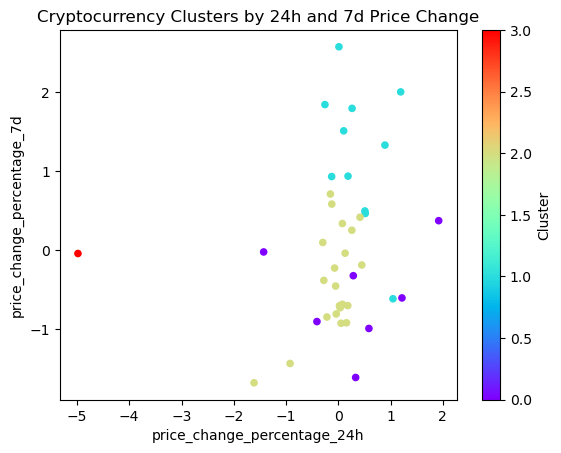

In [184]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

crypto_market_data_predictions.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",
    colormap="rainbow",
    title="Cryptocurrency Clusters by 24h and 7d Price Change"
)


### Optimize Clusters with Principal Component Analysis.

In [187]:
# Create a PCA model instance and set `n_components=3`.

pca = PCA(n_components=3)


In [189]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_market_data_df)
df_pca = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'], index=scaled_market_data_df.index)

# View the first five rows of the DataFrame. 
df_pca.head()


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [191]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for each component:", explained_variance)

Explained Variance Ratio for each component: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** ≈ 0.8950

In [194]:
# Creating a DataFrame with the PCA data
df_pca = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names (coin_id) from the original data
df_pca["coin_id"] = market_data_df.index

# Set the coin_id column as index
df_pca = df_pca.set_index("coin_id")

# Display sample data
df_pca.head(10)


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


In [196]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Creating a DataFrame with the PCA data
df_pca = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names from the original data
df_pca["coin_id"] = market_data_df.index

# Set the coinid column as index
df_pca = df_pca.set_index("coin_id")

# Display sample data
df_pca.head(10)


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [199]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, n_init='auto', random_state=1)
    
    kmeans_model.fit(df_pca)
    
    inertia.append(kmeans_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,39.094217
5,6,27.961695
6,7,24.462735
7,8,19.451747
8,9,13.755814
9,10,13.119661


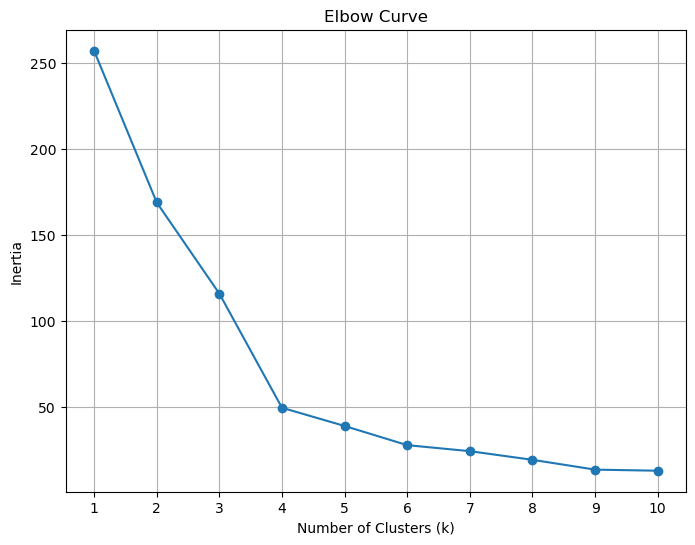

In [201]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(8, 6))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o')
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(elbow_df["k"])
plt.grid(True)
plt.show()


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** We could say 4 or 5 by using original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [205]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, n_init='auto', random_state=1)


In [207]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [209]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_clusters = kmeans_model.predict(df_pca)

# Print the resulting array of cluster values.
print("Cluster assignments:", crypto_clusters)

Cluster assignments: [1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 3
 0 0 0 0]


In [211]:
# Create a copy of the DataFrame with the PCA data
df_pca_predictions = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_predictions['Cluster'] = crypto_clusters

# Display sample data
df_pca_predictions.head()

,PCA1,PCA2,PCA3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [213]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas
scatter_plot = df_pca_predictions.hvplot.scatter(
    x="PCA1", 
    y="PCA2", 
    c="Cluster", 
    colormap="Winter", 
    title="Cryptocurrency Clusters by PCA1 and PCA2"
)

scatter_plot

:Scatter   [PCA1]   (PCA2,Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [216]:
# Use the columns from the original scaled DataFrame as the index.
df_pca_predictions_with_index = df_pca_predictions.set_index(scaled_market_data_df.index)
df_pca_predictions_with_index.head(10)

,PCA1,PCA2,PCA3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1
binancecoin,-0.516534,1.388377,0.804071,1
chainlink,-0.450711,0.517699,2.846143,1
cardano,-0.345600,0.729439,1.478013,1
litecoin,-0.649468,0.432165,0.600303,1


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** PCA1 captures 200-day and 1-year changes
* PCA2 is influenced by 30-day and 14-day changes
* PCA3 focuses on short-term like 7-day price change.
    